In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt
import numpy as np

In [89]:
IMAGE_SIZE = 256
BATCH_SIZE = 32 
CHANNELS = 3
EPOCHS = 30

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage", 
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
 len(dataset)

68

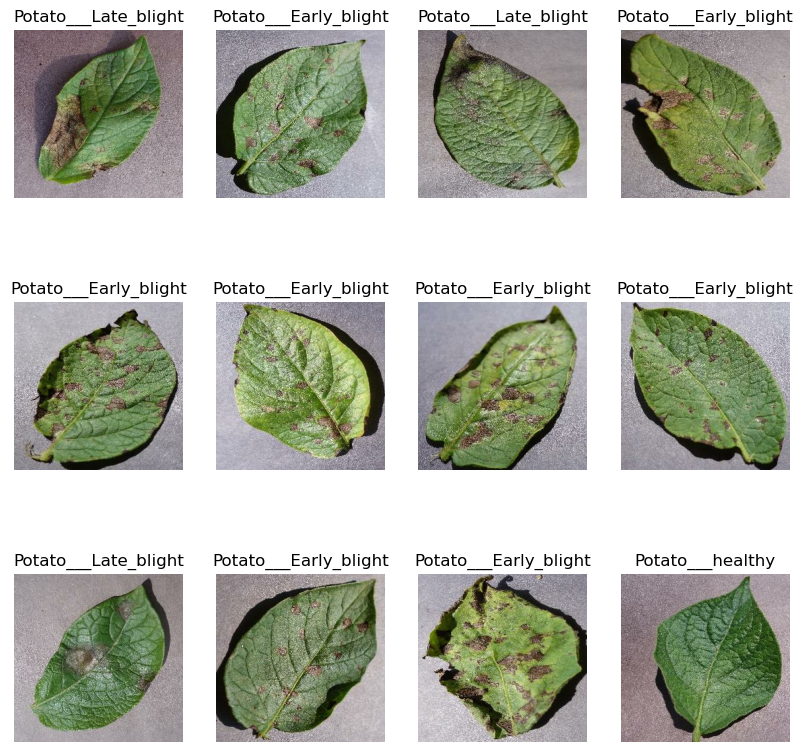

In [15]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis ("off")

In [16]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [18]:
train_size = 0.8
len(dataset)*train_size


54.400000000000006

In [19]:
train_ds = dataset.take(54)
len(train_ds)

54

In [20]:
test_ds =dataset.skip(54)
len(test_ds)

14

In [21]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [22]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [23]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [25]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size = 10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [26]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [27]:
len(test_ds)

8

In [28]:
len(train_ds)

54

In [29]:
len(val_ds)

6

In [30]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [31]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE), 
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [32]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"), 
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [41]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale, 
    data_augmentation, 
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers. MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D ((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'), 
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [90]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy']
)

In [91]:
history = model.fit(
    train_ds, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    verbose=1, 
    validation_data=val_ds
)

Epoch 1/30
54/54 [==============================] - 34s 624ms/step - loss: 0.0656 - accuracy: 0.9774 - val_loss: 0.0100 - val_accuracy: 0.9948
Epoch 2/30
54/54 [==============================] - 32s 590ms/step - loss: 0.0129 - accuracy: 0.9959 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 3/30
54/54 [==============================] - 33s 609ms/step - loss: 0.0116 - accuracy: 0.9971 - val_loss: 0.1574 - val_accuracy: 0.9375
Epoch 4/30
54/54 [==============================] - 34s 624ms/step - loss: 0.0272 - accuracy: 0.9896 - val_loss: 0.0389 - val_accuracy: 0.9896
Epoch 5/30
54/54 [==============================] - 34s 635ms/step - loss: 0.0438 - accuracy: 0.9861 - val_loss: 0.0930 - val_accuracy: 0.9740
Epoch 6/30
54/54 [==============================] - 36s 670ms/step - loss: 0.0359 - accuracy: 0.9867 - val_loss: 0.2091 - val_accuracy: 0.9740
Epoch 7/30
54/54 [==============================] - 35s 654ms/step - loss: 0.0546 - accuracy: 0.9797 - val_loss: 0.0158 - val_accuracy: 0.9896

In [92]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 1s 157ms/step - loss: 0.0014 - accuracy: 1.0000


In [93]:
scores

[0.001389967161230743, 1.0]

In [94]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [95]:
history.history['accuracy']

[0.9774305820465088,
 0.9959490895271301,
 0.9971064925193787,
 0.9895833134651184,
 0.9861111044883728,
 0.9866898059844971,
 0.9797453880310059,
 0.9936342835426331,
 0.9924768805503845,
 0.9809027910232544,
 0.9826388955116272,
 0.9942129850387573,
 0.9953703880310059,
 0.9959490895271301,
 0.9988425970077515,
 0.9878472089767456,
 0.9803240895271301,
 0.9826388955116272,
 0.984375,
 0.9890046119689941,
 0.9971064925193787,
 0.9988425970077515,
 0.9971064925193787,
 0.9861111044883728,
 0.9953703880310059,
 0.9947916865348816,
 0.9965277910232544,
 0.9947916865348816,
 0.9988425970077515,
 0.9988425970077515]

In [96]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

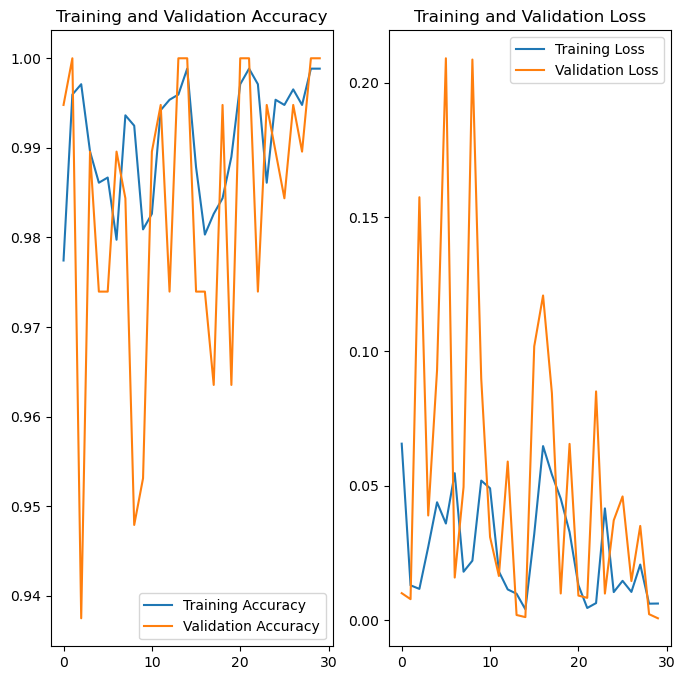

In [97]:
plt.figure(figsize=(8, 8)) 
plt.subplot (1, 2, 1) 
plt.plot(range(EPOCHS), acc, label='Training Accuracy') 
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss') 
plt.plot(range(EPOCHS), val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.show()

first image to predict
first image's actual label: Potato___Early_blight
1/1 [==============================] - 0s 229ms/step
predicted label: Potato___Early_blight


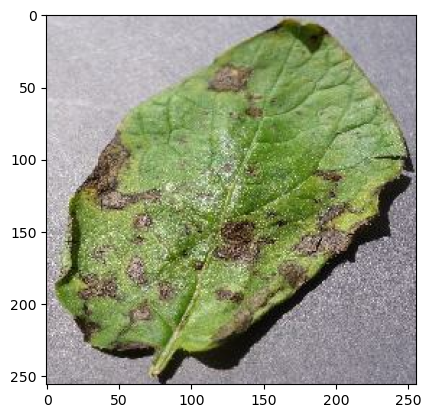

In [98]:
for images_batch, labels_batch in test_ds.take(1) :
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [99]:
def predict(model, img) :
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 16ms/step


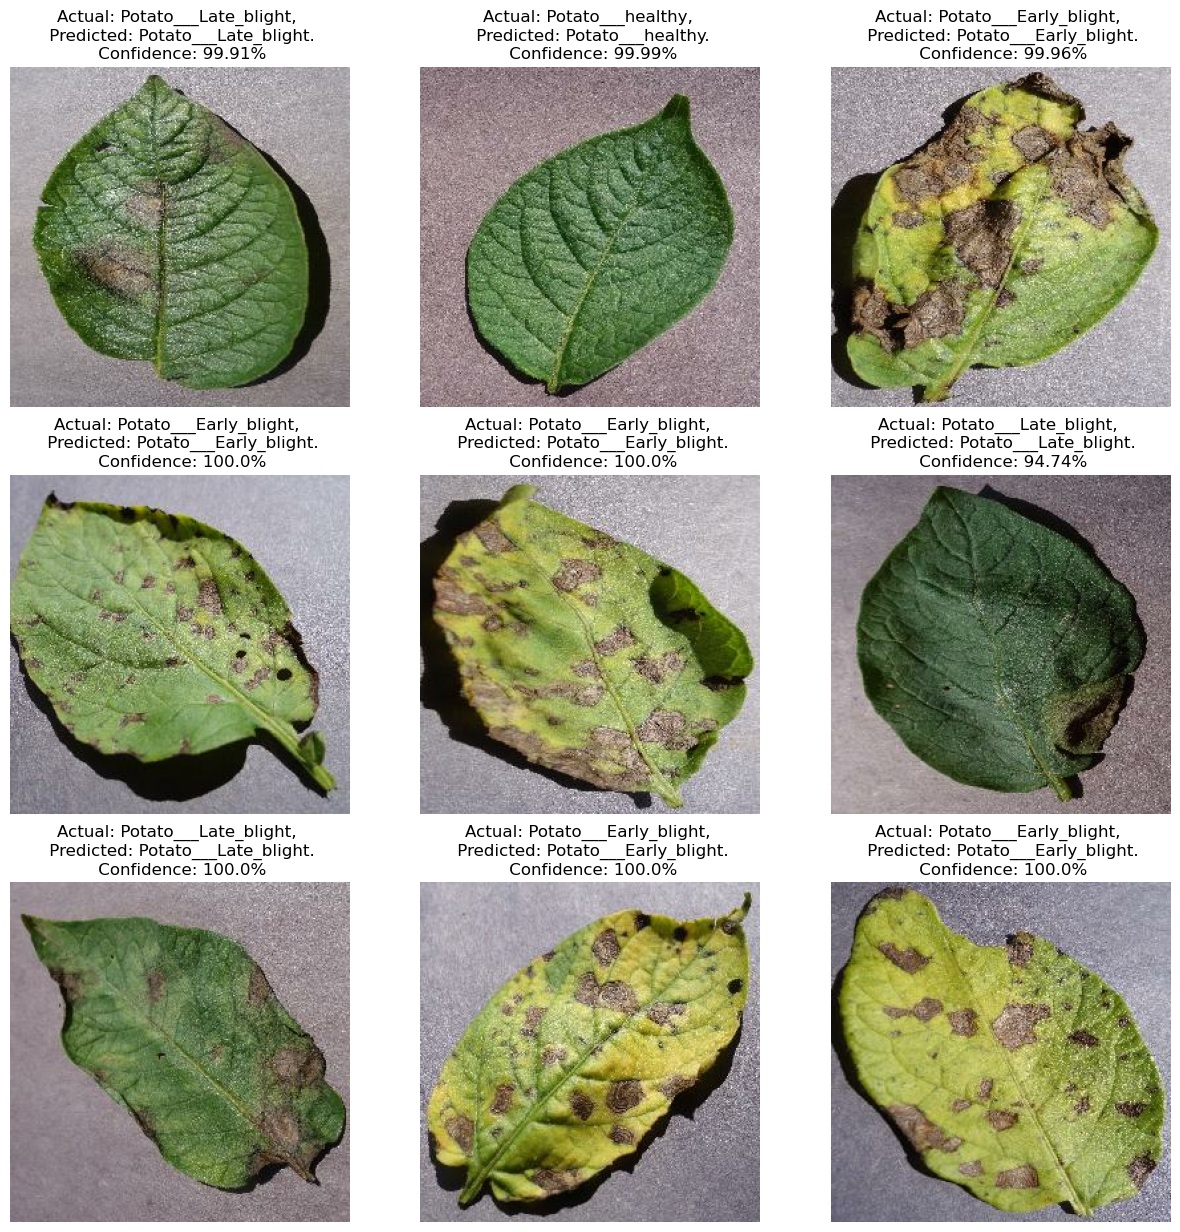

In [101]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take (1):
    for i in range(9):
        ax = plt.subplot (3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%") 
        plt.axis("off")

In [102]:
model_version = 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1/assets


INFO:tensorflow:Assets written to: ../models/1/assets
